In [1]:
!pip install pymongo

     |████████████████████████████████| 506 kB 26.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install tweepy

     |████████████████████████████████| 64 kB 2.3 MB/s  eta 0:00:01
     |████████████████████████████████| 146 kB 19.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install twitter

     |████████████████████████████████| 50 kB 7.4 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

In [8]:
client = MongoClient(mongod_connect)
db = client.lab9 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

In [11]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [9]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [12]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Thu Nov 04 19:02:11 +0000 2021'
'Thu Nov 04 19:02:11 +0000 2021'
'Thu Nov 04 19:02:11 +0000 2021'
'Thu Nov 04 19:02:11 +0000 2021'
'Thu Nov 04 19:02:11 +0000 2021'
'Thu Nov 04 19:02:11 +0000 2021'
'Thu Nov 04 19:02:10 +0000 2021'
'Thu Nov 04 19:02:09 +0000 2021'
'Thu Nov 04 19:02:09 +0000 2021'
'Thu Nov 04 19:02:09 +0000 2021'
'Thu Nov 04 19:02:08 +0000 2021'
'Thu Nov 04 19:02:08 +0000 2021'
'Thu Nov 04 19:02:07 +0000 2021'
'Thu Nov 04 19:02:07 +0000 2021'
'Thu Nov 04 19:02:06 +0000 2021'
'Thu Nov 04 19:02:06 +0000 2021'
'Thu Nov 04 19:02:05 +0000 2021'
'Thu Nov 04 19:02:04 +0000 2021'
'Thu Nov 04 19:02:04 +0000 2021'
'Thu Nov 04 19:02:03 +0000 2021'
'Thu Nov 04 19:02:03 +0000 2021'
'Thu Nov 04 19:02:03 +0000 2021'
'Thu Nov 04 19:02:02 +0000 2021'
'Thu Nov 04 19:02:02 +0000 2021'
'Thu Nov 04 19:02:01 +0000 2021'
'Thu Nov 04 19:02:00 +0000 2021'
'Thu Nov 04 19:02:00 +0000 2021'
'Thu Nov 04 19:01:59 +0000 2021'
'Thu Nov 04 19:01:59 +0000 2021'
'Thu Nov 04 19:01:58 +0000 2021'
'Thu Nov 0

In [13]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                         max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Thu Nov 04 19:01:23 +0000 2021'
'Thu Nov 04 19:01:23 +0000 2021'
'Thu Nov 04 19:01:22 +0000 2021'
'Thu Nov 04 19:01:21 +0000 2021'
'Thu Nov 04 19:01:21 +0000 2021'
'Thu Nov 04 19:01:21 +0000 2021'
'Thu Nov 04 19:01:20 +0000 2021'
'Thu Nov 04 19:01:20 +0000 2021'
'Thu Nov 04 19:01:20 +0000 2021'
'Thu Nov 04 19:01:20 +0000 2021'
'Thu Nov 04 19:01:20 +0000 2021'
'Thu Nov 04 19:01:19 +0000 2021'
'Thu Nov 04 19:01:19 +0000 2021'
'Thu Nov 04 19:01:19 +0000 2021'
'Thu Nov 04 19:01:18 +0000 2021'
'Thu Nov 04 19:01:18 +0000 2021'
'Thu Nov 04 19:01:17 +0000 2021'
'Thu Nov 04 19:01:17 +0000 2021'
'Thu Nov 04 19:01:16 +0000 2021'
'Thu Nov 04 19:01:16 +0000 2021'
'Thu Nov 04 19:01:15 +0000 2021'
'Thu Nov 04 19:01:15 +0000 2021'
'Thu Nov 04 19:01:14 +0000 2021'
'Thu Nov 04 19:01:14 +0000 2021'
'Thu Nov 04 19:01:14 +0000 2021'
'Thu Nov 04 19:01:14 +0000 2021'
'Thu Nov 04 19:01:14 +0000 2021'
'Thu Nov 04 19:01:14 +0000 2021'
'Thu Nov 04 19:01:13 +0000 2021'
'Thu Nov 04 19:01:13 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:59:57 +0000 2021'
'Thu Nov 04 18:59:56 +0000 2021'
'Thu Nov 04 18:59:54 +0000 2021'
'Thu Nov 04 18:59:54 +0000 2021'
'Thu Nov 04 18:59:54 +0000 2021'
'Thu Nov 04 18:59:52 +0000 2021'
'Thu Nov 04 18:59:52 +0000 2021'
'Thu Nov 04 18:59:51 +0000 2021'
'Thu Nov 04 18:59:50 +0000 2021'
'Thu Nov 04 18:59:50 +0000 2021'
'Thu Nov 04 18:59:50 +0000 2021'
'Thu Nov 04 18:59:48 +0000 2021'
'Thu Nov 04 18:59:48 +0000 2021'
'Thu Nov 04 18:59:47 +0000 2021'
'Thu Nov 04 18:59:47 +0000 2021'
'Thu Nov 04 18:59:46 +0000 2021'
'Thu Nov 04 18:59:46 +0000 2021'
'Thu Nov 04 18:59:46 +0000 2021'
'Thu Nov 04 18:59:45 +0000 2021'
'Thu Nov 04 18:59:45 +0000 2021'
'Thu Nov 04 18:59:45 +0000 2021'
'Thu Nov 04 18:59:45 +0000 2021'
'Thu Nov 04 18:59:45 +0000 2021'
'Thu Nov 04 18:59:45 +0000 2021'
'Thu Nov 04 18:59:45 +0000 2021'
'Thu Nov 04 18:59:44 +0000 2021'
'Thu Nov 04 18:59:44 +0000 2021'
'Thu Nov 04 18:59:43 +0000 2021'
'Thu Nov 04 18:59:43 +0000 2021'
'Thu Nov 04 18:59:42 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:57:36 +0000 2021'
'Thu Nov 04 18:57:36 +0000 2021'
'Thu Nov 04 18:57:35 +0000 2021'
'Thu Nov 04 18:57:35 +0000 2021'
'Thu Nov 04 18:57:33 +0000 2021'
'Thu Nov 04 18:57:33 +0000 2021'
'Thu Nov 04 18:57:33 +0000 2021'
'Thu Nov 04 18:57:32 +0000 2021'
'Thu Nov 04 18:57:31 +0000 2021'
'Thu Nov 04 18:57:29 +0000 2021'
'Thu Nov 04 18:57:28 +0000 2021'
'Thu Nov 04 18:57:28 +0000 2021'
'Thu Nov 04 18:57:27 +0000 2021'
'Thu Nov 04 18:57:27 +0000 2021'
'Thu Nov 04 18:57:26 +0000 2021'
'Thu Nov 04 18:57:26 +0000 2021'
'Thu Nov 04 18:57:26 +0000 2021'
'Thu Nov 04 18:57:25 +0000 2021'
'Thu Nov 04 18:57:25 +0000 2021'
'Thu Nov 04 18:57:25 +0000 2021'
'Thu Nov 04 18:57:24 +0000 2021'
'Thu Nov 04 18:57:23 +0000 2021'
'Thu Nov 04 18:57:23 +0000 2021'
'Thu Nov 04 18:57:23 +0000 2021'
'Thu Nov 04 18:57:21 +0000 2021'
'Thu Nov 04 18:57:21 +0000 2021'
'Thu Nov 04 18:57:21 +0000 2021'
'Thu Nov 04 18:57:20 +0000 2021'
'Thu Nov 04 18:57:18 +0000 2021'
'Thu Nov 04 18:57:18 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:55:33 +0000 2021'
'Thu Nov 04 18:55:31 +0000 2021'
'Thu Nov 04 18:55:31 +0000 2021'
'Thu Nov 04 18:55:31 +0000 2021'
'Thu Nov 04 18:55:30 +0000 2021'
'Thu Nov 04 18:55:29 +0000 2021'
'Thu Nov 04 18:55:28 +0000 2021'
'Thu Nov 04 18:55:28 +0000 2021'
'Thu Nov 04 18:55:28 +0000 2021'
'Thu Nov 04 18:55:26 +0000 2021'
'Thu Nov 04 18:55:26 +0000 2021'
'Thu Nov 04 18:55:25 +0000 2021'
'Thu Nov 04 18:55:25 +0000 2021'
'Thu Nov 04 18:55:23 +0000 2021'
'Thu Nov 04 18:55:22 +0000 2021'
'Thu Nov 04 18:55:22 +0000 2021'
'Thu Nov 04 18:55:22 +0000 2021'
'Thu Nov 04 18:55:22 +0000 2021'
'Thu Nov 04 18:55:21 +0000 2021'
'Thu Nov 04 18:55:21 +0000 2021'
'Thu Nov 04 18:55:21 +0000 2021'
'Thu Nov 04 18:55:20 +0000 2021'
'Thu Nov 04 18:55:20 +0000 2021'
'Thu Nov 04 18:55:19 +0000 2021'
'Thu Nov 04 18:55:18 +0000 2021'
'Thu Nov 04 18:55:18 +0000 2021'
'Thu Nov 04 18:55:18 +0000 2021'
'Thu Nov 04 18:55:17 +0000 2021'
'Thu Nov 04 18:55:17 +0000 2021'
'Thu Nov 04 18:55:16 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:53:20 +0000 2021'
'Thu Nov 04 18:53:20 +0000 2021'
'Thu Nov 04 18:53:20 +0000 2021'
'Thu Nov 04 18:53:18 +0000 2021'
'Thu Nov 04 18:53:18 +0000 2021'
'Thu Nov 04 18:53:17 +0000 2021'
'Thu Nov 04 18:53:17 +0000 2021'
'Thu Nov 04 18:53:16 +0000 2021'
'Thu Nov 04 18:53:14 +0000 2021'
'Thu Nov 04 18:53:14 +0000 2021'
'Thu Nov 04 18:53:14 +0000 2021'
'Thu Nov 04 18:53:13 +0000 2021'
'Thu Nov 04 18:53:12 +0000 2021'
'Thu Nov 04 18:53:12 +0000 2021'
'Thu Nov 04 18:53:11 +0000 2021'
'Thu Nov 04 18:53:11 +0000 2021'
'Thu Nov 04 18:53:11 +0000 2021'
'Thu Nov 04 18:53:11 +0000 2021'
'Thu Nov 04 18:53:11 +0000 2021'
'Thu Nov 04 18:53:11 +0000 2021'
'Thu Nov 04 18:53:11 +0000 2021'
'Thu Nov 04 18:53:10 +0000 2021'
'Thu Nov 04 18:53:10 +0000 2021'
'Thu Nov 04 18:53:10 +0000 2021'
'Thu Nov 04 18:53:09 +0000 2021'
'Thu Nov 04 18:53:08 +0000 2021'
'Thu Nov 04 18:53:07 +0000 2021'
'Thu Nov 04 18:53:06 +0000 2021'
'Thu Nov 04 18:53:06 +0000 2021'
'Thu Nov 04 18:53:06 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:50:54 +0000 2021'
'Thu Nov 04 18:50:54 +0000 2021'
'Thu Nov 04 18:50:53 +0000 2021'
'Thu Nov 04 18:50:53 +0000 2021'
'Thu Nov 04 18:50:53 +0000 2021'
'Thu Nov 04 18:50:53 +0000 2021'
'Thu Nov 04 18:50:53 +0000 2021'
'Thu Nov 04 18:50:52 +0000 2021'
'Thu Nov 04 18:50:52 +0000 2021'
'Thu Nov 04 18:50:51 +0000 2021'
'Thu Nov 04 18:50:50 +0000 2021'
'Thu Nov 04 18:50:49 +0000 2021'
'Thu Nov 04 18:50:48 +0000 2021'
'Thu Nov 04 18:50:47 +0000 2021'
'Thu Nov 04 18:50:47 +0000 2021'
'Thu Nov 04 18:50:47 +0000 2021'
'Thu Nov 04 18:50:46 +0000 2021'
'Thu Nov 04 18:50:46 +0000 2021'
'Thu Nov 04 18:50:45 +0000 2021'
'Thu Nov 04 18:50:45 +0000 2021'
'Thu Nov 04 18:50:44 +0000 2021'
'Thu Nov 04 18:50:43 +0000 2021'
'Thu Nov 04 18:50:43 +0000 2021'
'Thu Nov 04 18:50:43 +0000 2021'
'Thu Nov 04 18:50:42 +0000 2021'
'Thu Nov 04 18:50:42 +0000 2021'
'Thu Nov 04 18:50:42 +0000 2021'
'Thu Nov 04 18:50:42 +0000 2021'
'Thu Nov 04 18:50:41 +0000 2021'
'Thu Nov 04 18:50:41 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:48:40 +0000 2021'
'Thu Nov 04 18:48:39 +0000 2021'
'Thu Nov 04 18:48:39 +0000 2021'
'Thu Nov 04 18:48:38 +0000 2021'
'Thu Nov 04 18:48:38 +0000 2021'
'Thu Nov 04 18:48:38 +0000 2021'
'Thu Nov 04 18:48:37 +0000 2021'
'Thu Nov 04 18:48:37 +0000 2021'
'Thu Nov 04 18:48:36 +0000 2021'
'Thu Nov 04 18:48:35 +0000 2021'
'Thu Nov 04 18:48:35 +0000 2021'
'Thu Nov 04 18:48:35 +0000 2021'
'Thu Nov 04 18:48:34 +0000 2021'
'Thu Nov 04 18:48:33 +0000 2021'
'Thu Nov 04 18:48:33 +0000 2021'
'Thu Nov 04 18:48:33 +0000 2021'
'Thu Nov 04 18:48:33 +0000 2021'
'Thu Nov 04 18:48:32 +0000 2021'
'Thu Nov 04 18:48:32 +0000 2021'
'Thu Nov 04 18:48:32 +0000 2021'
'Thu Nov 04 18:48:32 +0000 2021'
'Thu Nov 04 18:48:31 +0000 2021'
'Thu Nov 04 18:48:31 +0000 2021'
'Thu Nov 04 18:48:31 +0000 2021'
'Thu Nov 04 18:48:30 +0000 2021'
'Thu Nov 04 18:48:30 +0000 2021'
'Thu Nov 04 18:48:30 +0000 2021'
'Thu Nov 04 18:48:30 +0000 2021'
'Thu Nov 04 18:48:30 +0000 2021'
'Thu Nov 04 18:48:29 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:46:36 +0000 2021'
'Thu Nov 04 18:46:34 +0000 2021'
'Thu Nov 04 18:46:33 +0000 2021'
'Thu Nov 04 18:46:33 +0000 2021'
'Thu Nov 04 18:46:32 +0000 2021'
'Thu Nov 04 18:46:31 +0000 2021'
'Thu Nov 04 18:46:31 +0000 2021'
'Thu Nov 04 18:46:29 +0000 2021'
'Thu Nov 04 18:46:27 +0000 2021'
'Thu Nov 04 18:46:27 +0000 2021'
'Thu Nov 04 18:46:26 +0000 2021'
'Thu Nov 04 18:46:25 +0000 2021'
'Thu Nov 04 18:46:25 +0000 2021'
'Thu Nov 04 18:46:25 +0000 2021'
'Thu Nov 04 18:46:25 +0000 2021'
'Thu Nov 04 18:46:25 +0000 2021'
'Thu Nov 04 18:46:24 +0000 2021'
'Thu Nov 04 18:46:24 +0000 2021'
'Thu Nov 04 18:46:23 +0000 2021'
'Thu Nov 04 18:46:23 +0000 2021'
'Thu Nov 04 18:46:22 +0000 2021'
'Thu Nov 04 18:46:21 +0000 2021'
'Thu Nov 04 18:46:20 +0000 2021'
'Thu Nov 04 18:46:19 +0000 2021'
'Thu Nov 04 18:46:19 +0000 2021'
'Thu Nov 04 18:46:19 +0000 2021'
'Thu Nov 04 18:46:18 +0000 2021'
'Thu Nov 04 18:46:18 +0000 2021'
'Thu Nov 04 18:46:18 +0000 2021'
'Thu Nov 04 18:46:18 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:44:24 +0000 2021'
'Thu Nov 04 18:44:24 +0000 2021'
'Thu Nov 04 18:44:24 +0000 2021'
'Thu Nov 04 18:44:23 +0000 2021'
'Thu Nov 04 18:44:23 +0000 2021'
'Thu Nov 04 18:44:23 +0000 2021'
'Thu Nov 04 18:44:22 +0000 2021'
'Thu Nov 04 18:44:22 +0000 2021'
'Thu Nov 04 18:44:22 +0000 2021'
'Thu Nov 04 18:44:22 +0000 2021'
'Thu Nov 04 18:44:21 +0000 2021'
'Thu Nov 04 18:44:21 +0000 2021'
'Thu Nov 04 18:44:20 +0000 2021'
'Thu Nov 04 18:44:20 +0000 2021'
'Thu Nov 04 18:44:20 +0000 2021'
'Thu Nov 04 18:44:19 +0000 2021'
'Thu Nov 04 18:44:18 +0000 2021'
'Thu Nov 04 18:44:18 +0000 2021'
'Thu Nov 04 18:44:17 +0000 2021'
'Thu Nov 04 18:44:16 +0000 2021'
'Thu Nov 04 18:44:16 +0000 2021'
'Thu Nov 04 18:44:16 +0000 2021'
'Thu Nov 04 18:44:16 +0000 2021'
'Thu Nov 04 18:44:16 +0000 2021'
'Thu Nov 04 18:44:15 +0000 2021'
'Thu Nov 04 18:44:15 +0000 2021'
'Thu Nov 04 18:44:15 +0000 2021'
'Thu Nov 04 18:44:14 +0000 2021'
'Thu Nov 04 18:44:14 +0000 2021'
'Thu Nov 04 18:44:13 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:42:19 +0000 2021'
'Thu Nov 04 18:42:18 +0000 2021'
'Thu Nov 04 18:42:18 +0000 2021'
'Thu Nov 04 18:42:18 +0000 2021'
'Thu Nov 04 18:42:18 +0000 2021'
'Thu Nov 04 18:42:18 +0000 2021'
'Thu Nov 04 18:42:18 +0000 2021'
'Thu Nov 04 18:42:17 +0000 2021'
'Thu Nov 04 18:42:17 +0000 2021'
'Thu Nov 04 18:42:17 +0000 2021'
'Thu Nov 04 18:42:16 +0000 2021'
'Thu Nov 04 18:42:16 +0000 2021'
'Thu Nov 04 18:42:15 +0000 2021'
'Thu Nov 04 18:42:15 +0000 2021'
'Thu Nov 04 18:42:14 +0000 2021'
'Thu Nov 04 18:42:13 +0000 2021'
'Thu Nov 04 18:42:13 +0000 2021'
'Thu Nov 04 18:42:13 +0000 2021'
'Thu Nov 04 18:42:12 +0000 2021'
'Thu Nov 04 18:42:12 +0000 2021'
'Thu Nov 04 18:42:11 +0000 2021'
'Thu Nov 04 18:42:11 +0000 2021'
'Thu Nov 04 18:42:11 +0000 2021'
'Thu Nov 04 18:42:11 +0000 2021'
'Thu Nov 04 18:42:10 +0000 2021'
'Thu Nov 04 18:42:10 +0000 2021'
'Thu Nov 04 18:42:09 +0000 2021'
'Thu Nov 04 18:42:09 +0000 2021'
'Thu Nov 04 18:42:09 +0000 2021'
'Thu Nov 04 18:42:09 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:40:25 +0000 2021'
'Thu Nov 04 18:40:23 +0000 2021'
'Thu Nov 04 18:40:21 +0000 2021'
'Thu Nov 04 18:40:20 +0000 2021'
'Thu Nov 04 18:40:19 +0000 2021'
'Thu Nov 04 18:40:18 +0000 2021'
'Thu Nov 04 18:40:18 +0000 2021'
'Thu Nov 04 18:40:18 +0000 2021'
'Thu Nov 04 18:40:18 +0000 2021'
'Thu Nov 04 18:40:17 +0000 2021'
'Thu Nov 04 18:40:17 +0000 2021'
'Thu Nov 04 18:40:16 +0000 2021'
'Thu Nov 04 18:40:16 +0000 2021'
'Thu Nov 04 18:40:15 +0000 2021'
'Thu Nov 04 18:40:15 +0000 2021'
'Thu Nov 04 18:40:15 +0000 2021'
'Thu Nov 04 18:40:15 +0000 2021'
'Thu Nov 04 18:40:14 +0000 2021'
'Thu Nov 04 18:40:14 +0000 2021'
'Thu Nov 04 18:40:13 +0000 2021'
'Thu Nov 04 18:40:13 +0000 2021'
'Thu Nov 04 18:40:12 +0000 2021'
'Thu Nov 04 18:40:11 +0000 2021'
'Thu Nov 04 18:40:10 +0000 2021'
'Thu Nov 04 18:40:09 +0000 2021'
'Thu Nov 04 18:40:09 +0000 2021'
'Thu Nov 04 18:40:09 +0000 2021'
'Thu Nov 04 18:40:09 +0000 2021'
'Thu Nov 04 18:40:08 +0000 2021'
'Thu Nov 04 18:40:08 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:38:09 +0000 2021'
'Thu Nov 04 18:38:09 +0000 2021'
'Thu Nov 04 18:38:09 +0000 2021'
'Thu Nov 04 18:38:09 +0000 2021'
'Thu Nov 04 18:38:08 +0000 2021'
'Thu Nov 04 18:38:08 +0000 2021'
'Thu Nov 04 18:38:07 +0000 2021'
'Thu Nov 04 18:38:07 +0000 2021'
'Thu Nov 04 18:38:07 +0000 2021'
'Thu Nov 04 18:38:06 +0000 2021'
'Thu Nov 04 18:38:05 +0000 2021'
'Thu Nov 04 18:38:03 +0000 2021'
'Thu Nov 04 18:38:03 +0000 2021'
'Thu Nov 04 18:38:02 +0000 2021'
'Thu Nov 04 18:38:02 +0000 2021'
'Thu Nov 04 18:38:02 +0000 2021'
'Thu Nov 04 18:38:02 +0000 2021'
'Thu Nov 04 18:38:02 +0000 2021'
'Thu Nov 04 18:38:01 +0000 2021'
'Thu Nov 04 18:38:01 +0000 2021'
'Thu Nov 04 18:38:00 +0000 2021'
'Thu Nov 04 18:38:00 +0000 2021'
'Thu Nov 04 18:38:00 +0000 2021'
'Thu Nov 04 18:37:59 +0000 2021'
'Thu Nov 04 18:37:58 +0000 2021'
'Thu Nov 04 18:37:58 +0000 2021'
'Thu Nov 04 18:37:58 +0000 2021'
'Thu Nov 04 18:37:58 +0000 2021'
'Thu Nov 04 18:37:57 +0000 2021'
'Thu Nov 04 18:37:56 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:35:57 +0000 2021'
'Thu Nov 04 18:35:56 +0000 2021'
'Thu Nov 04 18:35:56 +0000 2021'
'Thu Nov 04 18:35:55 +0000 2021'
'Thu Nov 04 18:35:55 +0000 2021'
'Thu Nov 04 18:35:55 +0000 2021'
'Thu Nov 04 18:35:55 +0000 2021'
'Thu Nov 04 18:35:55 +0000 2021'
'Thu Nov 04 18:35:54 +0000 2021'
'Thu Nov 04 18:35:51 +0000 2021'
'Thu Nov 04 18:35:51 +0000 2021'
'Thu Nov 04 18:35:51 +0000 2021'
'Thu Nov 04 18:35:51 +0000 2021'
'Thu Nov 04 18:35:48 +0000 2021'
'Thu Nov 04 18:35:48 +0000 2021'
'Thu Nov 04 18:35:48 +0000 2021'
'Thu Nov 04 18:35:47 +0000 2021'
'Thu Nov 04 18:35:47 +0000 2021'
'Thu Nov 04 18:35:45 +0000 2021'
'Thu Nov 04 18:35:44 +0000 2021'
'Thu Nov 04 18:35:43 +0000 2021'
'Thu Nov 04 18:35:42 +0000 2021'
'Thu Nov 04 18:35:42 +0000 2021'
'Thu Nov 04 18:35:42 +0000 2021'
'Thu Nov 04 18:35:41 +0000 2021'
'Thu Nov 04 18:35:41 +0000 2021'
'Thu Nov 04 18:35:40 +0000 2021'
'Thu Nov 04 18:35:40 +0000 2021'
'Thu Nov 04 18:35:39 +0000 2021'
'Thu Nov 04 18:35:39 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:33:29 +0000 2021'
'Thu Nov 04 18:33:29 +0000 2021'
'Thu Nov 04 18:33:28 +0000 2021'
'Thu Nov 04 18:33:28 +0000 2021'
'Thu Nov 04 18:33:28 +0000 2021'
'Thu Nov 04 18:33:26 +0000 2021'
'Thu Nov 04 18:33:26 +0000 2021'
'Thu Nov 04 18:33:26 +0000 2021'
'Thu Nov 04 18:33:25 +0000 2021'
'Thu Nov 04 18:33:25 +0000 2021'
'Thu Nov 04 18:33:25 +0000 2021'
'Thu Nov 04 18:33:24 +0000 2021'
'Thu Nov 04 18:33:24 +0000 2021'
'Thu Nov 04 18:33:24 +0000 2021'
'Thu Nov 04 18:33:23 +0000 2021'
'Thu Nov 04 18:33:23 +0000 2021'
'Thu Nov 04 18:33:23 +0000 2021'
'Thu Nov 04 18:33:22 +0000 2021'
'Thu Nov 04 18:33:21 +0000 2021'
'Thu Nov 04 18:33:21 +0000 2021'
'Thu Nov 04 18:33:21 +0000 2021'
'Thu Nov 04 18:33:20 +0000 2021'
'Thu Nov 04 18:33:19 +0000 2021'
'Thu Nov 04 18:33:19 +0000 2021'
'Thu Nov 04 18:33:19 +0000 2021'
'Thu Nov 04 18:33:18 +0000 2021'
'Thu Nov 04 18:33:18 +0000 2021'
'Thu Nov 04 18:33:17 +0000 2021'
'Thu Nov 04 18:33:15 +0000 2021'
'Thu Nov 04 18:33:15 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:31:19 +0000 2021'
'Thu Nov 04 18:31:18 +0000 2021'
'Thu Nov 04 18:31:18 +0000 2021'
'Thu Nov 04 18:31:18 +0000 2021'
'Thu Nov 04 18:31:18 +0000 2021'
'Thu Nov 04 18:31:17 +0000 2021'
'Thu Nov 04 18:31:16 +0000 2021'
'Thu Nov 04 18:31:16 +0000 2021'
'Thu Nov 04 18:31:15 +0000 2021'
'Thu Nov 04 18:31:15 +0000 2021'
'Thu Nov 04 18:31:13 +0000 2021'
'Thu Nov 04 18:31:13 +0000 2021'
'Thu Nov 04 18:31:13 +0000 2021'
'Thu Nov 04 18:31:13 +0000 2021'
'Thu Nov 04 18:31:13 +0000 2021'
'Thu Nov 04 18:31:12 +0000 2021'
'Thu Nov 04 18:31:12 +0000 2021'
'Thu Nov 04 18:31:11 +0000 2021'
'Thu Nov 04 18:31:11 +0000 2021'
'Thu Nov 04 18:31:11 +0000 2021'
'Thu Nov 04 18:31:11 +0000 2021'
'Thu Nov 04 18:31:11 +0000 2021'
'Thu Nov 04 18:31:11 +0000 2021'
'Thu Nov 04 18:31:10 +0000 2021'
'Thu Nov 04 18:31:10 +0000 2021'
'Thu Nov 04 18:31:10 +0000 2021'
'Thu Nov 04 18:31:10 +0000 2021'
'Thu Nov 04 18:31:09 +0000 2021'
'Thu Nov 04 18:31:09 +0000 2021'
'Thu Nov 04 18:31:08 +0000 2021'
'Thu Nov 0

'Thu Nov 04 18:29:46 +0000 2021'
'Thu Nov 04 18:29:46 +0000 2021'
'Thu Nov 04 18:29:45 +0000 2021'
'Thu Nov 04 18:29:45 +0000 2021'
'Thu Nov 04 18:29:45 +0000 2021'
'Thu Nov 04 18:29:44 +0000 2021'
'Thu Nov 04 18:29:42 +0000 2021'
'Thu Nov 04 18:29:41 +0000 2021'
'Thu Nov 04 18:29:41 +0000 2021'
'Thu Nov 04 18:29:41 +0000 2021'
'Thu Nov 04 18:29:41 +0000 2021'
'Thu Nov 04 18:29:40 +0000 2021'
'Thu Nov 04 18:29:40 +0000 2021'
'Thu Nov 04 18:29:40 +0000 2021'
'Thu Nov 04 18:29:39 +0000 2021'
'Thu Nov 04 18:29:39 +0000 2021'
'Thu Nov 04 18:29:39 +0000 2021'
'Thu Nov 04 18:29:39 +0000 2021'
'Thu Nov 04 18:29:39 +0000 2021'
'Thu Nov 04 18:29:37 +0000 2021'
'Thu Nov 04 18:29:37 +0000 2021'
'Thu Nov 04 18:29:37 +0000 2021'
'Thu Nov 04 18:29:36 +0000 2021'
'Thu Nov 04 18:29:36 +0000 2021'
'Thu Nov 04 18:29:35 +0000 2021'
'Thu Nov 04 18:29:35 +0000 2021'
'Thu Nov 04 18:29:35 +0000 2021'
'Thu Nov 04 18:29:34 +0000 2021'
'Thu Nov 04 18:29:34 +0000 2021'
'Thu Nov 04 18:29:34 +0000 2021'
'Thu Nov 0

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1456327635009744896&oauth_consumer_key=uHvizo6EmsBOVBzm5Rda1PlrT&oauth_nonce=10421130727305945354&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1636053324&oauth_token=60388598-MNOLnSnLK8ZJwWh2isDw0ojr0NXqc57nmNJ4ML4Z4&oauth_version=1.0&q=covid19&oauth_signature=P85ilgqe62Pz%2FJaUC36Xb6mIn0M%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

In [14]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users


4060
3481


In [15]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [18]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [19]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Skeptic
text: @_evelynrae Covid Vaccines are safe. Billions have been vaccinated world over. Getting vaccinated is important to eradicate #COVID19
----
name: swedishgranny
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…
----
name: Mark
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…
----
name: MARCUS
text: RT @BernieSpofforth: BELGIUM - Says NO! To mandatory vaccines and vaccine passports!

They know a vaccine passport won’t set them free. So…
----
name: marketSquare
text: RT @WHO: @DrTedros "No more #COVID19 vaccines should go to countries that have already vaccinated more than 40% of their population, until…
----
name: Flying Free
text: #antivax #vaccine #covid19 #pandemic #vaccination #medicine #science https://t.co/oV2sA12btM
----
name: ✨Patricia✨
text: RT @EpochTimes: The #CDC 

In [20]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vaccine"}}) # return tweets contain vote

In [21]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,favorited,retweeted,lang,retweeted_status,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status,withheld_in_countries
0,618430fd11e349fc1b484ddf,Thu Nov 04 19:00:34 +0000 2021,1456335582620160007,1456335582620160007,@_evelynrae Covid Vaccines are safe. Billions ...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.455821e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6184314511e349fc1b485ba5,Thu Nov 04 18:31:13 +0000 2021,1456328194580123649,1456328194580123649,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
2,6184311211e349fc1b485216,Thu Nov 04 18:51:46 +0000 2021,1456333366693961731,1456333366693961731,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
3,6184310311e349fc1b484f01,Thu Nov 04 18:58:46 +0000 2021,1456335125734731778,1456335125734731778,RT @BernieSpofforth: BELGIUM - Says NO! To man...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Wed Nov 03 18:30:11 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
4,6184313411e349fc1b485828,Thu Nov 04 18:39:01 +0000 2021,1456330158986731520,1456330158986731520,"RT @WHO: @DrTedros ""No more #COVID19 vaccines ...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 15:50:18 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
5,6184312e11e349fc1b48570d,Thu Nov 04 18:41:18 +0000 2021,1456330730674470921,1456330730674470921,#antivax #vaccine #covid19 #pandemic #vaccinat...,False,"{'hashtags': [{'text': 'antivax', 'indices': [...","{'iso_language_code': 'und', 'result_type': 'r...","<a href=""https://about.twitter.com/products/tw...",NaN,...,False,False,und,NaN,"{'media': [{'id': 1456330082155470851, 'id_str...",False,NaN,NaN,NaN,NaN
6,6184311411e349fc1b485273,Thu Nov 04 18:50:59 +0000 2021,1456333170727587841,1456333170727587841,RT @EpochTimes: The #CDC altered the definitio...,False,"{'hashtags': [{'text': 'CDC', 'indices': [20, ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 17:10:00 +0000 2021...,NaN,NaN,NaN,NaN,NaN,NaN
7,6184310911e349fc1b485051,Thu Nov 04 18:55:47 +0000 2021,1456334378292989964,1456334378292989964,"@soledadobrien Question: ""Are you vaccinated a...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.456061e+18,...,False,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,6184314311e349fc1b485b52,Thu Nov 04 18:31:52 +0000 2021,1456328358111977472,1456328358111977472,RT @Thompson_2017: MEP Christine ANDERSON spea...,False,"{'hashtags': [{'text': 'Covid19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,en,{'created_at': 'Thu Nov 04 17:58:27 +0000 2021...,NaN,False,1.456173e+18,1456173087792189441,NaN,NaN
9,6184313d11e349fc1b485a20,Thu Nov 04 18:34:41 +0000 2021,1456329068870344704,1456329068870344704,RT @UNICEFIndi

<AxesSubplot:>

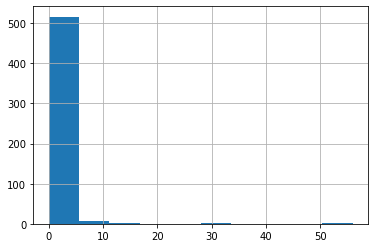

In [22]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count